In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Boston.csv')

data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
390,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
391,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
392,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [7]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['MEDV'], axis = 1), data['MEDV'], test_size=0.33, random_state=0)

x_test.shape

(131, 13)

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8309029691105901

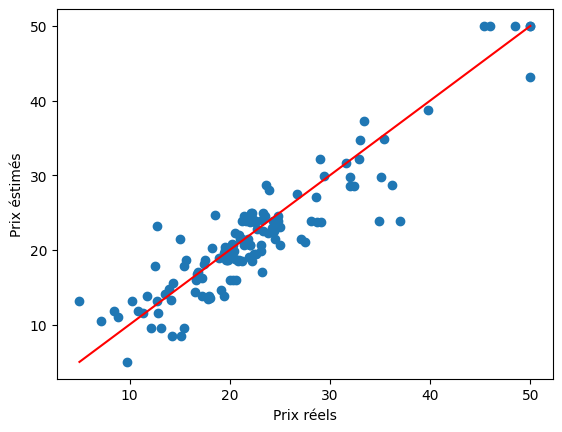

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Prix réels') ; plt.ylabel('Prix éstimés')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color="red")


### Comparaison sans profondeur en haut

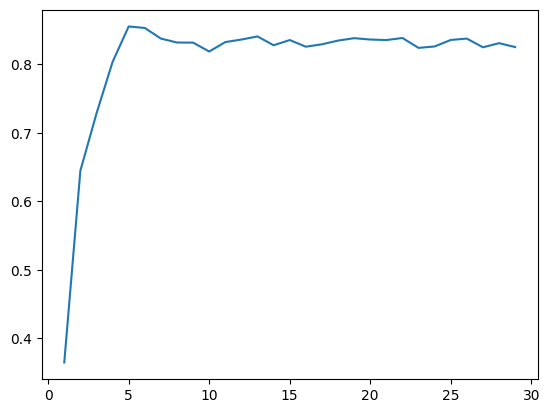

In [11]:
score=[]
for k in range (1,30):
    model = DecisionTreeRegressor(max_depth=k)
    model.fit(x_train, y_train)
    score.append(model.score(x_test, y_test))
plt.plot(range(1,30), score)

### Comparaison avec profondeur

In [12]:
model = DecisionTreeRegressor(max_depth=5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.8549651975078003

In [14]:
importance = pd.DataFrame(data = model.feature_importances_, index = model.feature_names_in_, columns=['importance'])
importance.sort_values(['importance'], ascending=False)

,importance
RM,0.666116
LSTAT,0.226771
CRIM,0.050340
DIS,0.036204
PTRATIO,0.006336
INDUS,0.006011
NOX,0.004333
TAX,0.002057
AGE,0.001832
ZN,0.000000


In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth= 5)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8529798887645338